In [123]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier ,VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
import xgboost as xgb 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [124]:
df = pd.read_csv('Train_data.csv')

# Data Summary

In [125]:
df.shape

(25192, 42)

In [126]:
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,anomaly


In [127]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
23374,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.08,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
1524,0,tcp,gopher,S0,0,0,0,0,0,0,...,7,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
20499,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,20,0.08,0.05,0.08,0.0,0.34,0.0,0.02,0.0,anomaly
19045,0,tcp,ftp_data,SF,748,0,0,0,0,0,...,26,0.12,0.02,0.12,0.0,0.00,0.0,0.00,0.0,normal
11262,0,udp,private,SF,28,0,0,3,0,0,...,40,0.16,0.02,0.16,0.0,0.00,0.0,0.64,0.0,anomaly


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [129]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [130]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [131]:
df.rename(columns = {'class':'attack'}, inplace=True)

In [132]:
X = df.drop("attack", axis=1)
y= df["attack"]

<AxesSubplot:xlabel='attack', ylabel='count'>

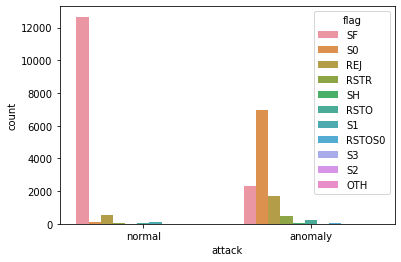

In [133]:
sns.countplot(df['attack'],hue=X['flag'])

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

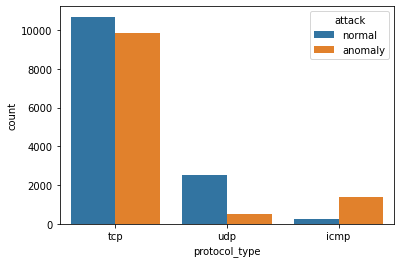

In [134]:
sns.countplot(df['protocol_type'], hue=y)

# data Preproccing

In [135]:
df.duplicated().sum()

0

In [136]:
df.nunique()

duration                        758
protocol_type                     3
service                          66
flag                             11
src_bytes                      1665
dst_bytes                      3922
land                              2
wrong_fragment                    3
urgent                            2
hot                              22
num_failed_logins                 5
logged_in                         2
num_compromised                  28
root_shell                        2
su_attempted                      3
num_root                         28
num_file_creations               20
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           466
srv_count                       414
serror_rate                      70
srv_serror_rate                  56
rerror_rate                      72
srv_rerror_rate             

### Feature Importance

In [137]:
le =LabelEncoder()
df['attack']= le.fit_transform(df.attack.values)

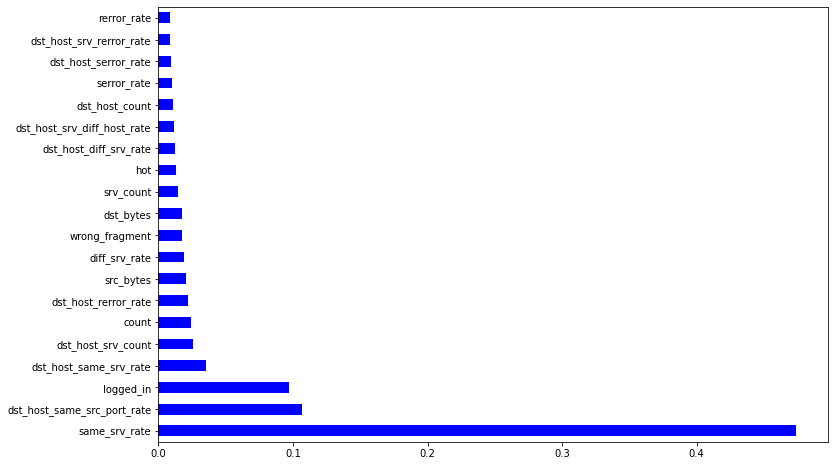

In [138]:
from sklearn.ensemble import ExtraTreesRegressor
X = df[['duration','src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]
y = df[['attack']]
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh",color="blue")

plt.show()
    


In [141]:
df =df.drop(['is_host_login', 'num_outbound_cmds','land','urgent','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_guest_login','srv_serror_rate','srv_rerror_rate','srv_diff_host_rate','dst_host_srv_serror_rate'], axis=1)

In [144]:
df.select_dtypes(exclude=np.number).nunique()

protocol_type     3
service          66
flag             11
dtype: int64

In [174]:
numeric_col = X.select_dtypes(include=np.number).columns
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

# Convert to Dummy Variables $ Label

In [153]:
#le  = LabelEncoder()
#X ['service'] = le.fit_transform(X['service'])
le =LabelEncoder()
df['service']= le.fit_transform(df.service.values)
df = pd.get_dummies(df ,drop_first=True)


In [177]:
X_train , X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=60) 


In [169]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [181]:
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_predl = mdl_local.predict(X_local)
    print(f'Test  : {mdl_local.score(X_local, y_local)}')
    print(f"F({bta}):" , fbeta_score(y_local, y_predl, beta= bta))
    print("Precision :", precision_score(y_local, y_predl))
    print("Recall :", recall_score(y_local, y_predl))
    print("f1_score : ",f1_score(y_local, y_predl))

 # LogisticRegression


In [171]:
m = LogisticRegression()

m.fit(X_train[numeric_col], y_train)
print(m.score(X_train[numeric_col], y_train ))
print(m.score(X_test[numeric_col] , y_test))



0.8755024065895897
0.8743798372692995


In [178]:
m = LogisticRegression(max_iter=1000)
m.fit(X_train_std, y_train)
y_predm = m.predict(X_test_std)
print(m.score(X_train_std, y_train ))
print(m.score(X_test_std , y_test))
print("f1_score : ",f1_score(y_test, y_predm))
#print("accuracy : " ,accuracy_score(y_test, y_predm) )
#print(" Recall : ",  recall_score(y_test, y_predm))
#print("precision  : ", precision_score(y_test ,y_predm))


0.9489902247804297
0.9484024608057154
f1_score :  0.950998869204674


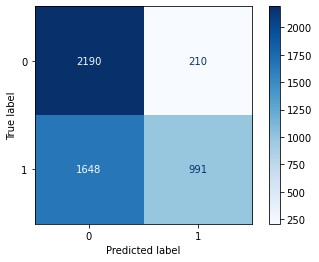

In [179]:
plot_confusion_matrix(m, X_test, y_test, cmap="Blues")

# KNN

In [112]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [113]:
y_predK = knn.predict(X_test_std)
print(knn.score(X_train_std, y_train ))
print(knn.score(X_test_std , y_test))
print("f1_score : ", f1_score(y_test, y_predK ))
#print(" Recall : ",  recall_score(y_test, y_predK))
#print("precision  : ", precision_score(y_test ,y_predK))
#print("accuracy : " , accuracy_score(y_test, y_predK) )

0.6393589043814817
0.6286961698749752
f1_score :  0.6798973481608211


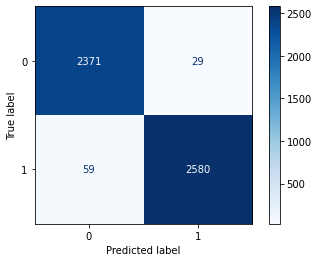

In [114]:
plot_confusion_matrix(knn, X_test, y_test, cmap="Blues")

# DecisionTreeClassifier

In [115]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_predt = dt.predict(X_test)
print("Trining ", dt.score(X_train,y_train))
print("Testing",dt.score(X_test,y_test))
print("f1_score :", f1_score(y_test, y_predt))
#print(" Recall : ",  recall_score(y_test, y_predt))
#print("precision  : ", precision_score(y_test ,y_predt))
#print("accuracy : " ,accuracy_score(y_test, y_predt) )

Trining  0.9746439736019451
Testing 0.9763842032149236
f1_score : 0.9772074315265274


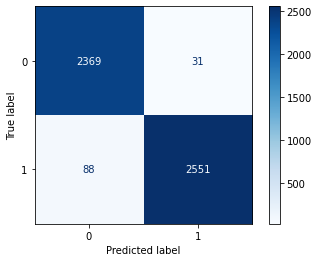

In [116]:
plot_confusion_matrix(dt, X_test, y_test, cmap="Blues")

# Randomforest

In [117]:
rt = RandomForestClassifier()
rt.fit(X_train,y_train)
y_predR = rt.predict(X_test)
print("Trining : ", rt.score(X_train,y_train))
print("Testing",rt.score(X_test,y_test))
print("f1_score :", f1_score(y_test, y_predR ))
#print(" Recall : ",  recall_score(y_test, y_predR))
#print("precision  : ", precision_score(y_test ,y_predR))
#print("accuracy : " ,accuracy_score(y_test, y_predR) )

Trining :  0.9999503795960899
Testing 0.9964278626711649
f1_score : 0.9965934897804695


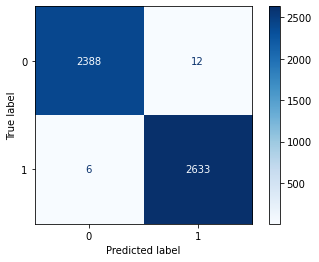

In [118]:
plot_confusion_matrix(rt, X_test, y_test, cmap="Blues")

# XGBoost

In [119]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=4,
                       objective="binary:logistic",  
                       learning_rate=0.5,
                       verbosity =0

                    
                      )
eval_set=[(X_train,y_train), (X_test, y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set = eval_set,
        verbose = False
                  
                   )

In [120]:
y_predg=gbm.predict(X_test)

In [180]:
print("Trining : " , gbm.score(X_train,y_train))
print("Testing :" ,gbm.score(X_test,y_test))
print("f1_score :", f1_score(y_test, y_predg))
#print(" Recall : ",  recall_score(y_test, y_predg))
#print("precision  : ", precision_score(y_test ,y_predg))
#print("accuracy : " ,accuracy_score(y_test, y_predg) )

Trining :  0.9999503795960899
Testing : 0.9966263147449891
f1_score : 0.9967796931236975


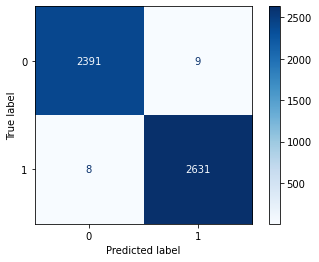

In [68]:
plot_confusion_matrix(gbm, X_test, y_test, cmap="Blues")

# graid Search RandomForestClassifier

In [182]:
randomforest = RandomForestClassifier()
param = {
    
    'n_estimators' : [10, 20, 40, 50,70],
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2, 3, 5, 9],
    'max_features':['auto', 'sqrt', 'log2']
        }
grid_randomforest = GridSearchCV(randomforest,param, n_jobs = -1)

In [183]:
grid_randomforest.fit(X_train,y_train)
best_rf = grid_randomforest.best_estimator_

best_rf 

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=40)

In [184]:
tuned_randomforest =grid_randomforest.best_estimator_


In [185]:
print(f'Train : {tuned_randomforest.score(X_train, y_train)}')
model_eval(tuned_randomforest,X_test,y_test)

Train : 0.9990075919217982
Test  : 0.9962294105973407
F(1): 0.996406279553622
Precision : 0.9947129909365559
Recall : 0.9981053429329292
f1_score :  0.996406279553622


# graid Search KNN

In [186]:
knn_model = KNeighborsClassifier()
prams ={ 'n_neighbors':[13,15,18,22]}
gd_knn= GridSearchCV(knn_model , param_grid=prams, n_jobs=-1 )
gd_knn.fit(X_train , y_train) 
gd_knn.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [187]:

tuned_knn = gd_knn.best_estimator_

In [188]:
from sklearn.metrics import fbeta_score
print(f'Train : {tuned_knn.score(X_train, y_train)}')
model_eval(tuned_knn,X_test,y_test)

Train : 0.9831786830744802
Test  : 0.9797578884699345
F(1): 0.9806744979158772
Precision : 0.9806744979158772
Recall : 0.9806744979158772
f1_score :  0.9806744979158772


# graid Search LogisticRegression


In [189]:
m = LogisticRegression()
param = {
        "C":[0.1,0.5,1.0,2.0]
        }
gd_LogisticRegression = GridSearchCV(m,param, n_jobs = -1)

In [190]:
gd_LogisticRegression.fit(X_train,y_train)
best_log = gd_LogisticRegression.best_estimator_
best_log

LogisticRegression(C=0.5)

In [191]:
print(f'Train : {best_log.score(X_train, y_train)}')
model_eval(best_log,X_test,y_test)

Train : 0.8769910187068922
Test  : 0.8757690017860686
F(1): 0.8825075075075075
Precision : 0.8743027147638527
Recall : 0.8908677529367185
f1_score :  0.8825075075075075


# Bagging

In [192]:
bg = BaggingClassifier( LogisticRegression(), n_estimators =17 , max_samples=0.5 ,bootstrap=True)
bg.fit(X_train,y_train)
y_pre_b = bg.predict(X_test)

print("Trining : ", bg.score(X_train_std,y_train))
print("Testing",bg.score(X_test_std,y_test))
print("accuracy : " ,accuracy_score(y_test, y_pre_b) )
print("f1_score :", f1_score(y_test, y_pre_b ))
print(" Recall : ",  recall_score(y_test, y_pre_b))
print("precision  : ", precision_score(y_test ,y_pre_b))

Trining :  0.871185431449412
Testing 0.8676324667592776
accuracy :  0.8769597142290136
f1_score : 0.8845007451564829
 Recall :  0.8995831754452445
precision  :  0.8699157200439721


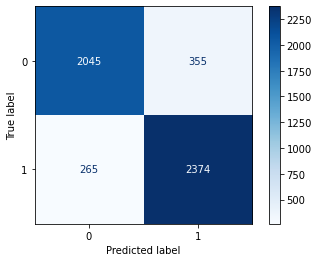

In [193]:
plot_confusion_matrix(bg, X_test, y_test, cmap="Blues")

# Hard Voting

In [98]:
Log=LogisticRegression() 
RF=RandomForestClassifier()
DT=DecisionTreeClassifier()
Voting_Classifer = VotingClassifier(estimators=[('Log',Log),('RF',RF),('DT',DT)],voting='hard',n_jobs=-1)
Voting_Classifer.fit(X_train, y_train)
print('Training: ',f1_score(Voting_Classifer.predict(X_train), y_train))
print('Testing : ',f1_score(Voting_Classifer.predict(X_test), y_test))

Training:  0.9999537443915075
Testing :  0.9960234804014391


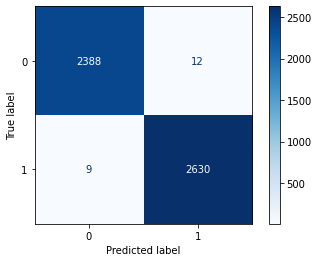

In [99]:
plot_confusion_matrix(Voting_Classifer, X_test, y_test, cmap="Blues")

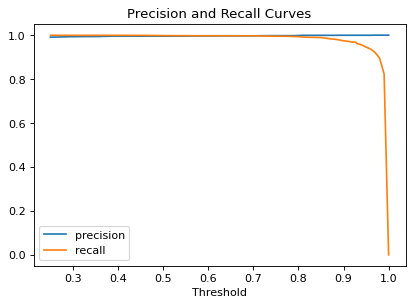

In [102]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rt.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold' );
plt.title('Precision and Recall Curves');

In [194]:
#y_predict = (rt.predict_proba(X_test)[:,1] > 0.9) #[:,1] 
#print("Threshold of 0.7:")
#print("Precision: {:6.4f},   Recall: {:6.4f},   f1: {:6.4f}".format(precision_score(y_test, y_predict), recall_score(y_test, y_predict),f1_score(y_test, y_predict)))